In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Checking Correlation between height and weight

Text(0, 0.5, 'Weight')

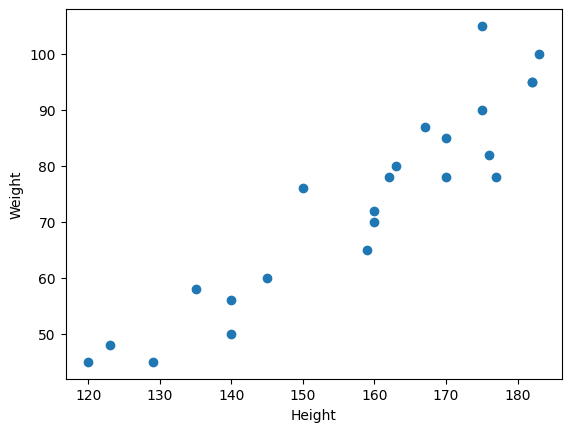

In [4]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")

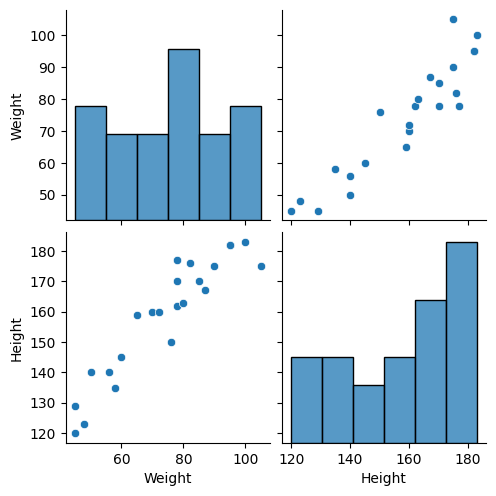

In [5]:
sns.pairplot(df)

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


Independent and Dependent Features


In [7]:
X = df[['Weight']]
y = df['Height']

Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
print(X_train.shape)
print(x_test.shape)

(17, 1)
(6, 1)


Standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(x_test)

Apply Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regression = LinearRegression(n_jobs = -1)
regression.fit(X_train, y_train)
print("Coefficient or slope : ", regression.coef_)
print("Intercept : ", regression.intercept_)

Coefficient or slope :  [17.2982057]
Intercept :  156.47058823529412


In [14]:
y_predict = regression.predict(X_test)
y_predict

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_predict)
print(mse)
print(mae)
print(rmse)
print(score)

114.84069295228699
9.66512588679501
10.716374991212605
0.7360826717981276


Adjusted r square

In [19]:
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.6701033397476595


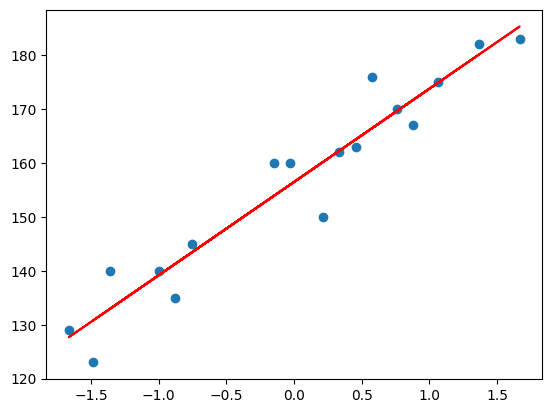

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train), color = 'red')

In [33]:
def predict_height(weight):
    arr = regression.predict(scaler.transform([[weight]]))
    print(arr[0])

In [34]:
weight = int(input('Enter wieight : '))
print("Predicedt height is ", end="")
predict_height(weight)

Predicedt height is 132.9230964595926


e:\jai\Python Workspace\Krish Naik Udemy\Python\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
